## Data

The location data extracted below will be used for the analysis. Foursquare data provides all nearby venues within a neighborhood. For this paper we will only keep the sports and recreational venues when we conduct our analysis. For the purpose of this paper the following columns are chosen as sports or recreational venues: 'Athletics & Sports','Baseball Field', 'Baseball Stadium','Basketball Court','Basketball Stadium', 'Beach','Climbing Gym','College Gym', 'College Rec Center', 'College Stadium','Curling Ice','Dance Studio','Dog Run','Escape Room','Field','Golf Course','Gym','Gym / Fitness Center','Hockey Arena','Indoor Play Area','Martial Arts School','Other Great Outdoors','Park','Playground','Pool','Skate Park','Skating Rink','Stadium','Swim School','Tennis Court', 'Trail', 'Yoga Studio'

In [5]:
import pandas as pd # library for data analsysis

toronto_sports=pd.read_excel(r"C:\Users\Dell\Documents\Data Science\toronto_sports.xlsx",
             sheet_name='Sheet_name_1')

In [6]:
toronto_sports.head(10)

,Neighborhood,Athletics & Sports,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym,College Rec Center,College Stadium,Curling Ice,Dance Studio,Dog Run,Escape Room,Field,Golf Course,Gym,Gym / Fitness Center,Hockey Arena,Indoor Play Area,Martial Arts School,Other Great Outdoors,Park,Playground,Pool,Skate Park,Skating Rink,Stadium,Swim School,Tennis Court,Trail,Yoga Studio
0,Agincourt,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.20,0.000000,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.125,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
3,Bayview Village,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
5,Berczy Park,0.000,0.0,0.0,0.0,0.017544,0.017544,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
6,"Birch Cliff, Cliffside West",0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.25,0.000000,0.0,0.0,0.0,0.0
7,"Brockton, Parkdale Village, Exhibition Place",0.000,0.0,0.0,0.0,0.000000,0.000000,0.041667,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.041667,0.0,0.0,0.0,0.0
8,"CN Tower, King and Spadina, Railway Lands, Har...",0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
9,Caledonia-Fairbanks,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.25,0.0,0.00,0.000000,0.0,0.0,0.0,0.0


### Check top 5 venues

In [7]:
num_top_venues = 5

for hood in toronto_sports['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_sports[toronto_sports['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                venue  freq
0        Skating Rink   0.2
1  Athletics & Sports   0.0
2      Baseball Field   0.0
3               Trail   0.0
4        Tennis Court   0.0


----Alderwood, Long Branch----
                venue  freq
0  Athletics & Sports  0.12
1                 Gym  0.12
2    Baseball Stadium  0.00
3    Basketball Court  0.00
4               Trail  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                venue  freq
0                Park  0.04
1  Athletics & Sports  0.00
2      Baseball Field  0.00
3               Trail  0.00
4        Tennis Court  0.00


----Bayview Village----
                venue  freq
0  Athletics & Sports   0.0
1      Baseball Field   0.0
2               Trail   0.0
3        Tennis Court   0.0
4         Swim School   0.0


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Athletics & Sports   0.0
1      Baseball Field   0.0
2               Trail   0.0
3        Tennis Court   0.0
4        

### Upon inspection some of the columns have zero values for all columns. This means that there are no nearby sports or recreational venues in this neighborhoods. To make our analysis reliable, we will remove all neighborhoods with zero total.

In [8]:
toronto_sports_sum = toronto_sports.set_index('Neighborhood')
toronto_sports_sum["total"] = toronto_sports_sum.sum(axis=1)

toronto_sports_sum=toronto_sports_sum.reset_index()

toronto_sports_filtered= toronto_sports_sum[toronto_sports_sum["total"]>0]
toronto_sports_filtered=toronto_sports_filtered.drop(columns=["total"])

In [9]:
toronto_sports_filtered.head(10)

,Neighborhood,Athletics & Sports,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym,College Rec Center,College Stadium,Curling Ice,Dance Studio,Dog Run,Escape Room,Field,Golf Course,Gym,Gym / Fitness Center,Hockey Arena,Indoor Play Area,Martial Arts School,Other Great Outdoors,Park,Playground,Pool,Skate Park,Skating Rink,Stadium,Swim School,Tennis Court,Trail,Yoga Studio
0,Agincourt,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.20,0.000000,0.0,0.0,0.0,0.000000
1,"Alderwood, Long Branch",0.125000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.043478,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
5,Berczy Park,0.000000,0.0,0.0,0.0,0.017544,0.017544,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.017544,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
6,"Birch Cliff, Cliffside West",0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.25,0.000000,0.0,0.0,0.0,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.0,0.0,0.000000,0.000000,0.041667,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.041667,0.0,0.0,0.0,0.000000
9,Caledonia-Fairbanks,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.25,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
10,Cedarbrae,0.125000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000
11,Central Bay Street,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015873,0.0,0.0,0.0,0.0,0.015873,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.015873
12,Christie,0.055556,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.111111,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000


### We will then get the top 10 venues for each neighborhood. This will be useful later once we create the clusters

In [14]:
#Group top 10 venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_sports_filtered['Neighborhood']

for ind in np.arange(toronto_sports_filtered.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_sports_filtered.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
1,"Alderwood, Long Branch",Athletics & Sports,Gym,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
2,"Bathurst Manor, Wilson Heights, Downsview North",Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
5,Berczy Park,Basketball Stadium,Beach,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Climbing Gym,College Gym
6,"Birch Cliff, Cliffside West",Skating Rink,College Stadium,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym


### To choose the appropriate number K that we will use for our Cluster analysis, we will create an Elbow Plot to determine the most optimal K for the data.

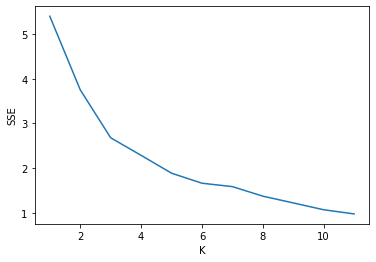

In [11]:
toronto_sports_clustering = toronto_sports_filtered.drop('Neighborhood', 1)
#Elbow Method
k_rng = range(1,12)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(toronto_sports_clustering)
    sse.append(km.inertia_)

from matplotlib import pyplot as plt

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

### Based on the plot above, the most optimal K to use is K=3. However, some may also consider K=6 as an optimal elbow point. For this project, we will choose K=3 for our Cluster Analysis.

In [15]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_sports_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:]

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = pd.read_excel(r"C:\Users\Dell\Documents\Data Science\df.xlsx",
             sheet_name='Sheet_name_1')

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged=toronto_merged.dropna()
toronto_merged.shape

(71, 16)

### We have assigned a Cluster for each neighborhood. We will then plot the location of each neighborhood and color label them according to cluster.

In [17]:
df=pd.read_excel(r"C:\Users\Dell\Documents\Data Science\df.xlsx",
             sheet_name='Sheet_name_1')
latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
longitude = df.loc[0, 'Longitude'] # neighborhood longitude value
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### We will then check the contents of each cluster. We will then label the cluster depending on the characteristics of each.

In [18]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,0.0,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
21,York,0.0,Park,Pool,Yoga Studio,Dog Run,Dance Studio,Curling Ice,College Stadium,College Rec Center,College Gym,Climbing Gym
35,East York/East Toronto,0.0,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
40,North York,0.0,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
46,North York,0.0,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
49,North York,0.0,Basketball Court,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Climbing Gym,College Gym
61,Central Toronto,0.0,Park,Swim School,Yoga Studio,Dog Run,Dance Studio,Curling Ice,College Stadium,College Rec Center,College Gym,Climbing Gym
64,York,0.0,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
66,North York,0.0,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
68,Central Toronto,0.0,Trail,Park,Escape Room,Dog Run,Dance Studio,Curling Ice,College Stadium,College Rec Center,Yoga Studio,Field


### The common similarity of the neighborhoods inside the cluster is that there are a lot of nearby Parks. We will then call this Cluster as the "Park Cluster".

In [19]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,1.0,Hockey Arena,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
2,Downtown Toronto,1.0,Park,Yoga Studio,Gym / Fitness Center,Dog Run,Dance Studio,Curling Ice,College Stadium,College Rec Center,College Gym,Field
4,Queen's Park,1.0,Yoga Studio,Park,Gym,Dog Run,Dance Studio,Curling Ice,College Stadium,College Rec Center,College Gym,Field
7,North York,1.0,Gym,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
8,East York,1.0,Athletics & Sports,Gym / Fitness Center,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
9,Downtown Toronto,1.0,Park,Gym,Gym / Fitness Center,College Rec Center,Other Great Outdoors,Escape Room,Dance Studio,Curling Ice,College Stadium,Yoga Studio
10,North York,1.0,Park,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
13,North York,1.0,Gym,Yoga Studio,Field,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym
14,East York,1.0,Athletics & Sports,Park,Dance Studio,Curling Ice,Skating Rink,Dog Run,College Stadium,College Rec Center,College Gym,Climbing Gym
15,Downtown Toronto,1.0,Park,Gym,Yoga Studio,Dog Run,Dance Studio,Curling Ice,College Stadium,College Rec Center,College Gym,Field


### The second cluster does not seem tho have a common facility for each neighborhood. Since there are a lot of variety when it comes to the available facilities, we will call this cluster the "Variety Cluster".

In [20]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,North York,2.0,Baseball Field,Yoga Studio,Trail,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym,College Rec Center
57,North York,2.0,Baseball Field,Yoga Studio,Trail,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym,College Rec Center
101,Etobicoke,2.0,Baseball Field,Yoga Studio,Trail,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Climbing Gym,College Gym,College Rec Center


### The third cluster has neighborhoods near to a Baseball Field. We will call this cluster the "Baseball Cluster".